# Aula 2: Feature Engineering

## Redução da dimensionalidade
- Maldição da dimensionalidade
- Manifold hypothesis
- Avaliação da relevância das variáveis para fins analíticos
- Análise Fatorial
- Análise discriminante 
- Análise de Componentes Principais

Podemos expressar dados como uma relação entre variáveis. Cada variável tem uma certa variação. Você pode calcular a variabilidade como a medida de variância em torno da média. Quanto maior a variância, maior será a informação contida na variável.

Além disso, se você colocar a variável em um conjunto, poderá comparar a variância de duas variáveis ​​para determinar se elas se correlacionam, o que é uma medida de quão fortemente elas têm valores semelhantes.

Verificando todas as possíveis correlações de uma variável com as outras no conjunto, você pode descobrir que pode ter dois tipos de variância:

- Variância única: a variação é única para a variável em exame, não estando associada ao que acontece com qualquer outra variável.

- Variância compartilhada: alguma variação é compartilhada com uma ou mais outras variáveis, criando redundância nos dados. A redundância implica que você pode encontrar a mesma informação, com valores ligeiramente diferentes, em vários recursos e em muitas observações.

A próxima etapa é determinar o motivo da variação compartilhada. Tentar responder a essa pergunta, bem como determinar como lidar com variâncias únicas e compartilhadas, levou à criação da análise fatorial e dos componentes principais.

## Análise Fatorial

A análise fatorial é um método estatístico usado para descrever a variabilidade entre variáveis ​​observadas e correlacionadas em termos de um número potencialmente menor de variáveis ​​não observadas chamadas fatores. 

Por exemplo, é possível que variações em seis variáveis ​​observadas reflitam principalmente as variações em duas variáveis ​​não observadas (subjacentes). A análise fatorial procura por tais variações conjuntas em resposta a variáveis ​​latentes não observadas. 

As variáveis ​​observadas são modeladas como combinações lineares dos fatores potenciais, mais os termos de "erro". A análise fatorial visa encontrar variáveis ​​latentes independentes.

A teoria por trás dos métodos analíticos de fator é que as informações obtidas sobre as interdependências entre as variáveis ​​observadas podem ser usadas posteriormente para reduzir o conjunto de variáveis ​​em um conjunto de dados.

A Análise Fatorial ajuda na interpretação dos dados, reduzindo o número de variáveis. 

![](https://res.cloudinary.com/dchysltjf/image/upload/f_auto,q_auto:best/v1554830233/1.png)

A análise fatorial é amplamente utilizada em pesquisa de mercado, publicidade, psicologia, finanças e pesquisa operacional. Os pesquisadores de mercado usam a análise fatorial para identificar clientes sensíveis ao preço, identificar características da marca que influenciam a escolha do consumidor e ajudam a compreender os critérios de seleção de canal para o canal de distribuição.



### Regressão Múltipla versus Análise Fatorial

A regressão múltipla tenta prever o valor de uma variável dependente Y, como uma função linear de uma série de variáveis ​​independentes X. A análise fatorial tenta reduzir uma matriz de variáveis ​​X correlacionadas a um conjunto menor de variáveis ​​não correlacionadas, conhecidas como fatores.

Nesse estudo da análise fatorial usaremos uma base descrevendo 25 itens de autorrelato de personalidade retirados do International Personality Item Pool (ipip.ori.org). Esses itens foram incluídos como parte do projeto de avaliação de personalidade baseado na web Synthetic Aperture Personality Assessment (SAPA). 

Os dados de 2.800 indivíduos são incluídos aqui como um conjunto de demonstração para construção de escala, análise fatorial e análise da Teoria de Resposta ao Item. Três variáveis ​​demográficas adicionais (sexo, educação e idade) também estão incluídas. 

(Fonte: https://vincentarelbundock.github.io/Rdatasets/doc/psych/bfi.html)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
bfi = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv")

In [3]:
bfi.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [4]:
bfi.drop(['Unnamed: 0','gender', 'education', 'age'],
         axis=1,inplace=True) # retirando variáveis desnecessárias

- A1: Am indifferent to the feelings of others. (q_146)
- A2: Inquire about others' well-being. (q_1162)
- A3: Know how to comfort others. (q_1206)
- A4: Love children. (q_1364)
- A5: Make people feel at ease. (q_1419)
- C1: Am exacting in my work. (q_124)
- C2: Continue until everything is perfect. (q_530)
- C3: Do things according to a plan. (q_619)
- C4: Do things in a half-way manner. (q_626)
- C5: Waste my time. (q_1949)
- E1: Don't talk a lot. (q_712)
- E2: Find it difficult to approach others. (q_901)
- E3: Know how to captivate people. (q_1205)
- E4: Make friends easily. (q_1410)
- E5: Take charge. (q_1768)
- N1: Get angry easily. (q_952)
- N2: Get irritated easily. (q_974)
- N3: Have frequent mood swings. (q_1099
- N4: Often feel blue. (q_1479)
- N5: Panic easily. (q_1505)
- O1: Am full of ideas. (q_128)
- O2: Avoid difficult reading material.(q_316)
- O3: Carry the conversation to a higher level. (q_492)
- O4: Spend time reflecting on things. (q_1738)
- O5: Will not probe deeply into a subject. (q_1964)
- gender: Males = 1, Females =2
- education: 1 = HS, 2 = finished HS, 3 = some college, 4 = college graduate 5 = graduate degree
- age: age in years

In [5]:
bfi.isna().sum()

A1    16
A2    27
A3    26
A4    19
A5    16
C1    21
C2    24
C3    20
C4    26
C5    16
E1    23
E2    16
E3    25
E4     9
E5    21
N1    22
N2    21
N3    11
N4    36
N5    29
O1    22
O2     0
O3    28
O4    14
O5    20
dtype: int64

In [6]:
bfi.dropna(inplace=True)

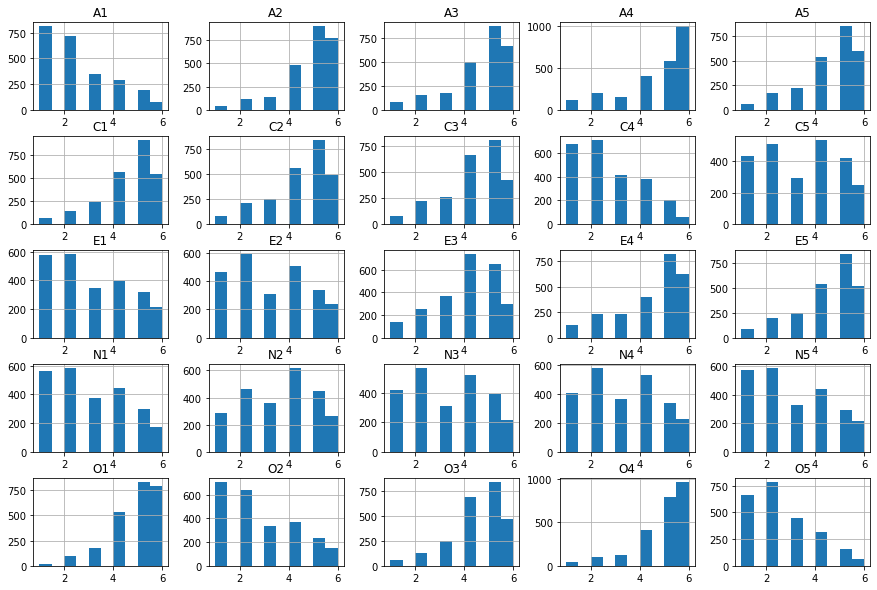

In [7]:
bfi.hist(figsize=(15,10));

### Teste de Adequação

Antes de realizar a análise fatorial, você precisa avaliar a “fatorabilidade” de nosso conjunto de dados. Fatorabilidade significa "podemos encontrar os fatores no conjunto de dados?". Existem dois métodos para verificar a fatorabilidade ou adequação da amostragem:

- Teste de Bartlett

- Teste Kaiser-Meyer-Olkin

O teste de esfericidade de Bartlett verifica se as variáveis ​​observadas se intercorrelacionam ou não usando a matriz de correlação observada contra a matriz de identidade. Se o teste for estatisticamente insignificante, você não deve empregar uma análise fatorial.

In [ ]:
%pip install factor_analyzer

In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [9]:
chi_square_value, p_value = calculate_bartlett_sphericity(bfi)
chi_square_value, p_value

(18170.966350869257, 0.0)

- Neste teste de Bartlett, o valor p é 0. O teste foi estatisticamente significativo, indicando que a matriz de correlação observada não é uma matriz de identidade.

- O teste Kaiser-Meyer-Olkin (KMO) mede a adequação dos dados para a análise fatorial. Ele determina a adequação para cada variável observada e para o modelo completo. KMO estima a proporção da variância entre todas as variáveis ​​observadas. Menor proporção é mais adequado para análise fatorial. Os valores de KMO variam entre 0 e 1. O valor de KMO menor que 0,6 é considerado inadequado.

In [10]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [11]:
kmo_all, kmo_model = calculate_kmo(bfi)

In [12]:
kmo_model

0.848539722194922

O KMO geral para nossos dados é 0,84, o que é excelente. Este valor indica que você pode prosseguir com sua análise fatorial planejada.

### Escolhendo o número de fatores

Para escolher o número de fatores, você pode usar o critério de Kaiser e o gráfico de scree. Ambos são baseados em valores próprios (eigenvalues).

In [13]:
from factor_analyzer import FactorAnalyzer

In [14]:
fa = FactorAnalyzer(rotation=None)

In [15]:
fa.fit(bfi)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

Aqui, você pode ver apenas que os valores próprios de 6 fatores são maiores que um. Isso significa que precisamos escolher apenas 6 fatores (ou variáveis ​​não observadas).

Podemos ver esses autovalores num gráfico de scree. Nas estatísticas multivariadas, um gráfico de scree é um gráfico de linha dos autovalores de fatores ou componentes principais em uma análise.

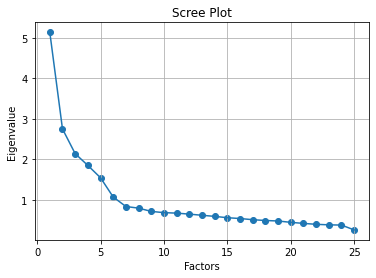

In [16]:
plt.scatter(range(1,bfi.shape[1]+1),ev)
plt.plot(range(1,bfi.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Analisando as cargas fatoriais

Com a análise fatorial, o pesquisador pode primeiro identificar as
dimensões separadas da estrutura (os fatores) e então determinar o grau em que cada variável é explicada por cada fator. Esse grau permite associar cada fator às variáveis que ele melhor explica, permitindo com isso uma análise semântica dentro do contexto informacional da base original.


In [17]:
fa = FactorAnalyzer(n_factors=6,rotation="varimax")
fa.fit(bfi)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [18]:
fat = pd.DataFrame(fa.loadings_,columns=['Fator 1','Fator 2','Fator 3','Fator 4','Fator 5','Fator 6'],index=bfi.columns)

In [19]:
fat

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


- O fator 1 tem altas cargas fatoriais para N1, N2, N3, N4 e N5 (Neuroticismo).
- O fator 2 tem altas cargas fatoriais para E1, E2, E3, E4 e E5 (Extroversão).
- O fator 3 tem altas cargas fatoriais para C1, C2, C3, C4 e C5 (Consciência).
- O fator 4 tem altas cargas fatoriais para O1, O2, O3, O4 e O5 (Abertura).
- O fator 5 tem altas cargas fatoriais para A1, A2, A3, A4 e A5 (Amabilidade).
- O fator 6 não tem nenhum carga fatorial significativa para qualquer variável e não é facilmente interpretável. Sendo assim é melhor considerarmos apenas cinco fatores.

In [20]:
fa = FactorAnalyzer(n_factors=5,rotation="varimax")
fa.fit(bfi)
fat = pd.DataFrame(fa.loadings_,columns=['Fator 1','Fator 2','Fator 3','Fator 4','Fator 5'],index=bfi.columns)

In [21]:
# linha 1: Soma das cargas fatoriais quadraticas (variância)
# linha 2: Variância proporcional
# linha 3: Variância acumulada
# colunas representam os fatores
fa.get_factor_variance()

(array([2.70963262, 2.47308983, 2.04110564, 1.844498  , 1.52215297]),
 array([0.1083853 , 0.09892359, 0.08164423, 0.07377992, 0.06088612]),
 array([0.1083853 , 0.2073089 , 0.28895312, 0.36273304, 0.42361916]))

Variância cumulativa total de 42% explicada pelos 5 fatores (0.1083853 + 0.09892359 + 0.08164423 + 0.07377992 + 0.06088612).

Transformando a base de entrada usando os fatores.

In [22]:
bfiFat = fa.transform(bfi)

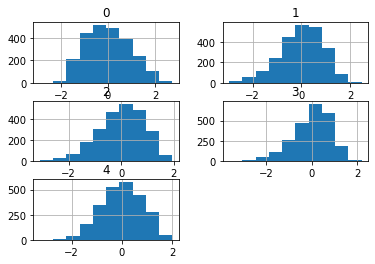

In [24]:
pd.DataFrame(bfiFat).hist();

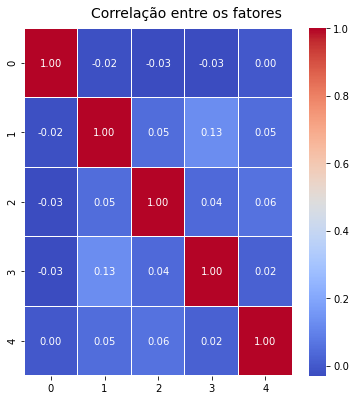

In [26]:
f, ax = plt.subplots(figsize=(6, 6))
corr = pd.DataFrame(bfiFat).corr()

hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlação entre os fatores', fontsize=14)

### Prós e Contras da Análise Fatorial

A análise fatorial explora um grande conjunto de dados e encontra associações entre suas variáveis. Ele reduz as variáveis ​​observadas a algumas variáveis ​​não observadas ou identifica os grupos de variáveis ​​inter-relacionadas, que ajudam os pesquisadores de mercado a comprimir as situações de mercado e encontrar a relação oculta entre gosto, preferência e influência cultural do consumidor. Além disso, ajuda a melhorar o questionário em pesquisas futuras. Fatores tornam a interpretação de dados mais natural.

Os resultados da análise fatorial são controversos. Suas interpretações podem ser discutíveis porque mais de uma interpretação pode ser feita dos mesmos fatores de dados. Após a identificação dos fatores e a nomeação dos fatores, é necessário conhecimento do domínio.

## Análise de Componentes Principais

A análise de componente principal (PCA) é um procedimento estatístico que usa uma transformação ortogonal para converter um conjunto de observações de variáveis ​​possivelmente correlacionadas (cada uma das entidades com vários valores numéricos) em um conjunto de valores de variáveis ​​linearmente não correlacionadas chamadas componentes principais.

De uma perspectiva simplificada, o PCA transforma os dados linearmente em novas propriedades que não estão correlacionadas entre si.

![](https://www.statistixl.com/images/PCA1.gif)

O algoritmo PCA rotaciona o dataset de forma a diminuir correlação

Os componentes são ordenados por variância.

Há tantos componentes quanto dimensões no espaço original.

Utilizado para diminuição de dimensionalidade e escolha de componentes (ou eixos) principais.

https://setosa.io/ev/principal-component-analysis/

### Análise Fatorial vs. Análise de componentes principais

Os componentes do PCA explicam a quantidade máxima de variância, enquanto a análise fatorial explica a covariância nos dados.

Os componentes do PCA são totalmente ortogonais entre si, enquanto a análise fatorial não exige que os fatores sejam ortogonais.

O componente PCA é uma combinação linear da variável observada, enquanto em FA, as variáveis ​​observadas são combinações lineares da variável ou fator não observado.

Os componentes do PCA não podem ser interpretados. Na Análise Fatorial os fatores subjacentes são rotuláveis ​​e interpretáveis.

PCA é um tipo de método de redução de dimensionalidade, enquanto a análise fatorial é o método de variável latente.

PCA é um tipo de análise fatorial. PCA é observacional enquanto Análise Fatorial é uma técnica de modelagem.





In [28]:
from sklearn.decomposition import FactorAnalysis

In [29]:
iris = sns.load_dataset('iris')

In [30]:
x = iris.drop(columns=['species'])
y = iris['species']

In [31]:
factor = FactorAnalysis(n_components=4, random_state=1).fit(x)

In [34]:
pd.DataFrame(factor.components_, columns=x.columns)

,sepal_length,sepal_width,petal_length,petal_width
0,0.706989,-0.158005,1.654236,0.70085
1,0.115161,0.159635,-0.044321,-0.01403
2,-0.000000,0.000000,0.000000,0.00000
3,-0.000000,0.000000,0.000000,-0.00000


No teste do conjunto de dados Iris, por exemplo, os fatores resultantes devem ser no máximo 2, não 4, porque apenas dois fatores têm conexões significativas com os recursos originais. Você pode usar esses dois fatores como novas variáveis ​​em seu projeto porque eles refletem um recurso não visto, mas importante, que os dados disponíveis anteriormente apenas sugeriam.

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA().fit(x)

In [38]:
print('Variância por componente:  %s' % pca.explained_variance_ratio_)
print(pd.DataFrame(pca.components_, columns=x.columns))

Variância por componente:  [0.92461872 0.05306648 0.01710261 0.00521218]
   sepal_length  sepal_width  petal_length  petal_width
0      0.361387    -0.084523      0.856671     0.358289
1      0.656589     0.730161     -0.173373    -0.075481
2     -0.582030     0.597911      0.076236     0.545831
3     -0.315487     0.319723      0.479839    -0.753657


Nesta decomposição do conjunto de dados Iris, a matriz vetorial fornecida por explain_variance_ratio_ indica que a maioria das informações está concentrada no primeiro componente (92,5 por cento). Portanto, é possível reduzir todo o conjunto de dados a apenas dois componentes, proporcionando uma redução de ruído e informações redundantes do conjunto de dados original.

**O PCA do sklearn centra a média dos dados em zero**

In [52]:
x_mean = x.mean()

In [55]:
x_center = x - x_mean

In [60]:
pca = PCA().fit(x_center)

In [62]:
print('Variância por componente:  %s' % pca.explained_variance_ratio_)
print(pd.DataFrame(pca.components_, columns=x.columns))

Variância por componente:  [0.92461872 0.05306648 0.01710261 0.00521218]
   sepal_length  sepal_width  petal_length  petal_width
0      0.361387    -0.084523      0.856671     0.358289
1      0.656589     0.730161     -0.173373    -0.075481
2     -0.582030     0.597911      0.076236     0.545831
3     -0.315487     0.319723      0.479839    -0.753657


Nesta decomposição do conjunto de dados Iris, a matriz vetorial fornecida por explain_variance_ratio_ indica que a maioria das informações está concentrada no primeiro componente (92,5 por cento). Portanto, é possível reduzir todo o conjunto de dados a apenas dois componentes, proporcionando uma redução de ruído e informações redundantes do conjunto de dados original.

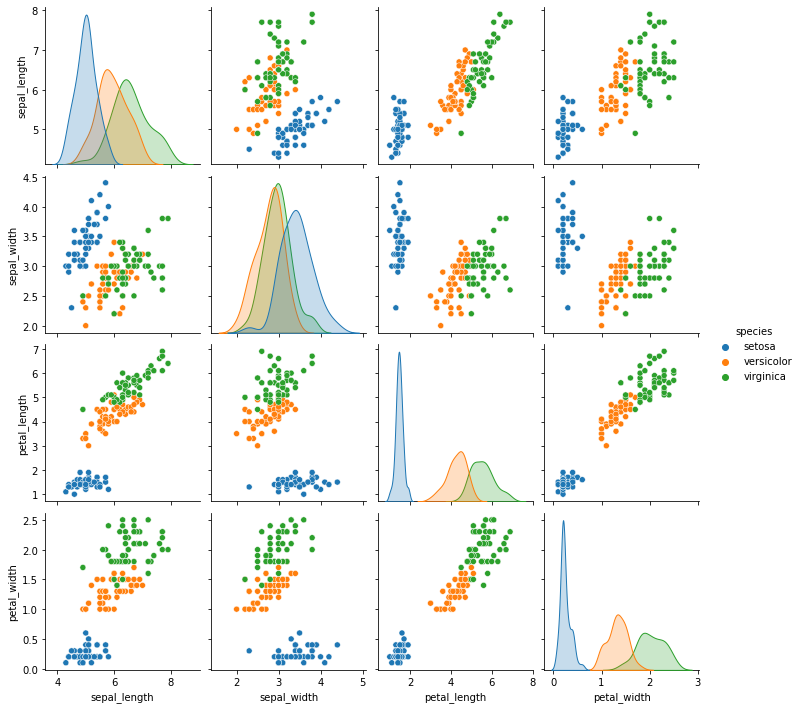

In [63]:
sns.pairplot(iris, hue='species');

In [64]:
pca = PCA(n_components=2).fit(x)
irisPCA = pca.transform(x)

In [67]:
irisPCA = pd.DataFrame(irisPCA, columns=['pca1', 'pca2'])
irisPCA['species'] = iris['species']

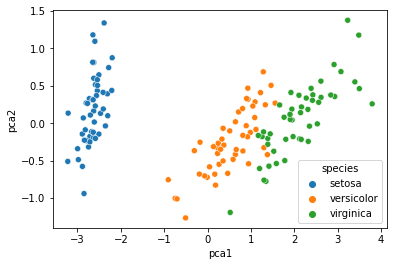

In [70]:
sns.scatterplot(data=irisPCA, x='pca1', y='pca2', hue='species');

Aplicando o PCA é base bfi:

In [76]:
pca = PCA(random_state=1).fit(bfi[1:])
print ('Variância por componente: {}'.format(pca.explained_variance_ratio_))
#pd.DataFrame(pca.components_,columns=bfi.columns)

Variância por componente: [0.21567855 0.11961559 0.08195672 0.07045686 0.06116198 0.0421275
 0.0359585  0.0346392  0.02936046 0.02831597 0.02675633 0.02402135
 0.0235249  0.02243272 0.02149205 0.0196956  0.01935969 0.01808419
 0.01744056 0.01652522 0.01613364 0.01499927 0.01469151 0.01342705
 0.01214459]


Veja que nessa caso nenhum componente concentra sozinho uma grande parte da informação. São necessários ao menos 20 componentes para explicar 90% da variância. 

Os 5 primeiros componentes concentram 48% da variância, mais ou menos a mesma variância explicada pelos 5 fatores obtidos na Análise Fatorial.

In [80]:
bfiPC = pca.transform(bfi)

### Analisando a correlação das variáveis versus a correlação dos componentes.

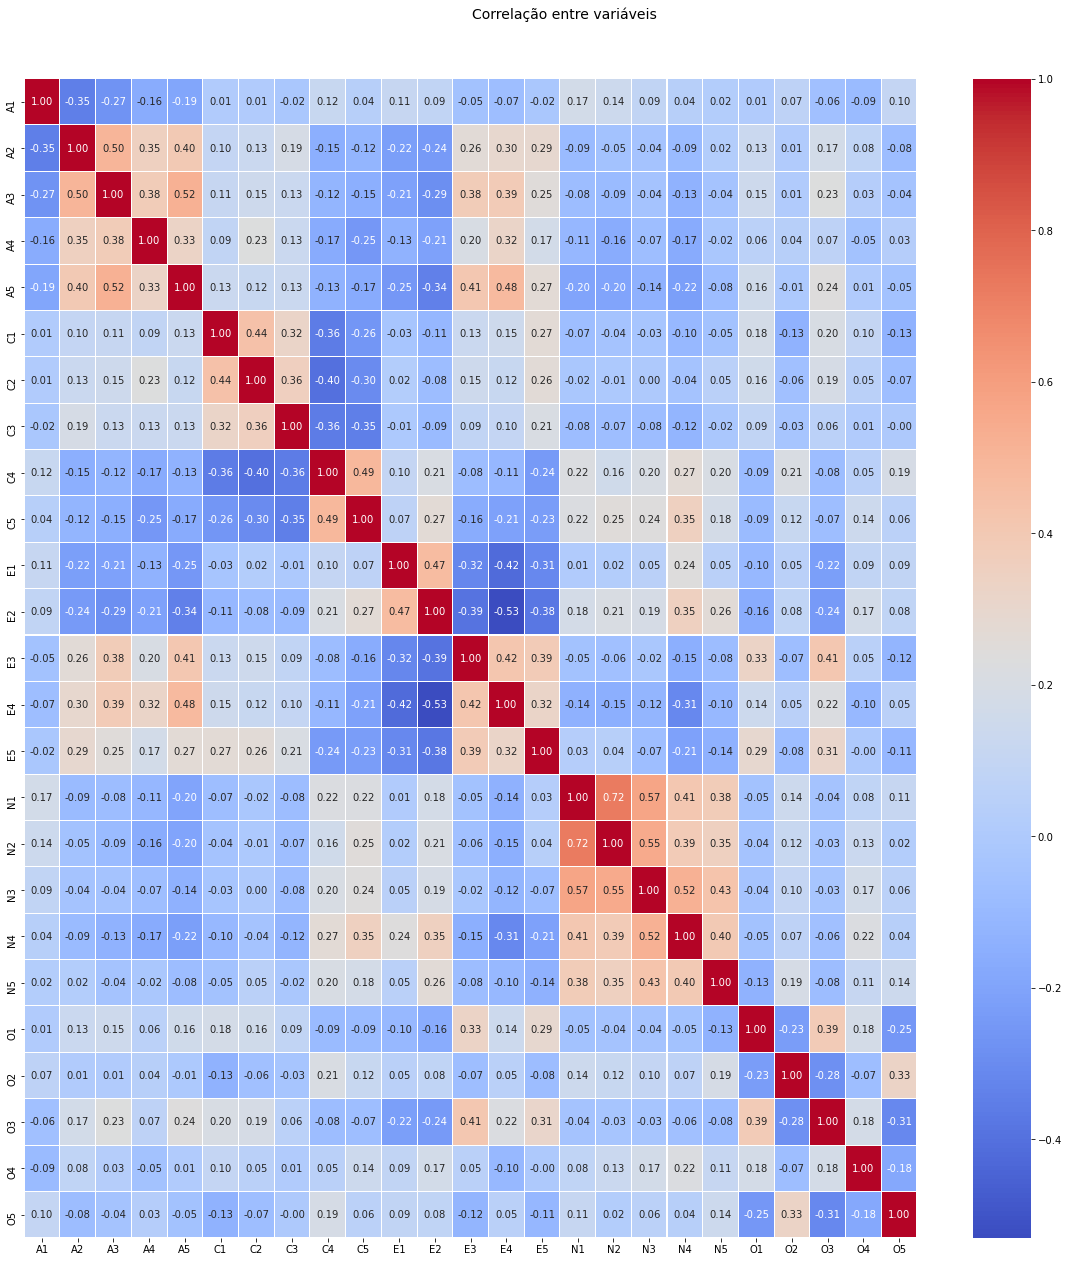

In [81]:
f, ax = plt.subplots(figsize=(20,20))
corr = bfi.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlação entre variáveis', fontsize=14)

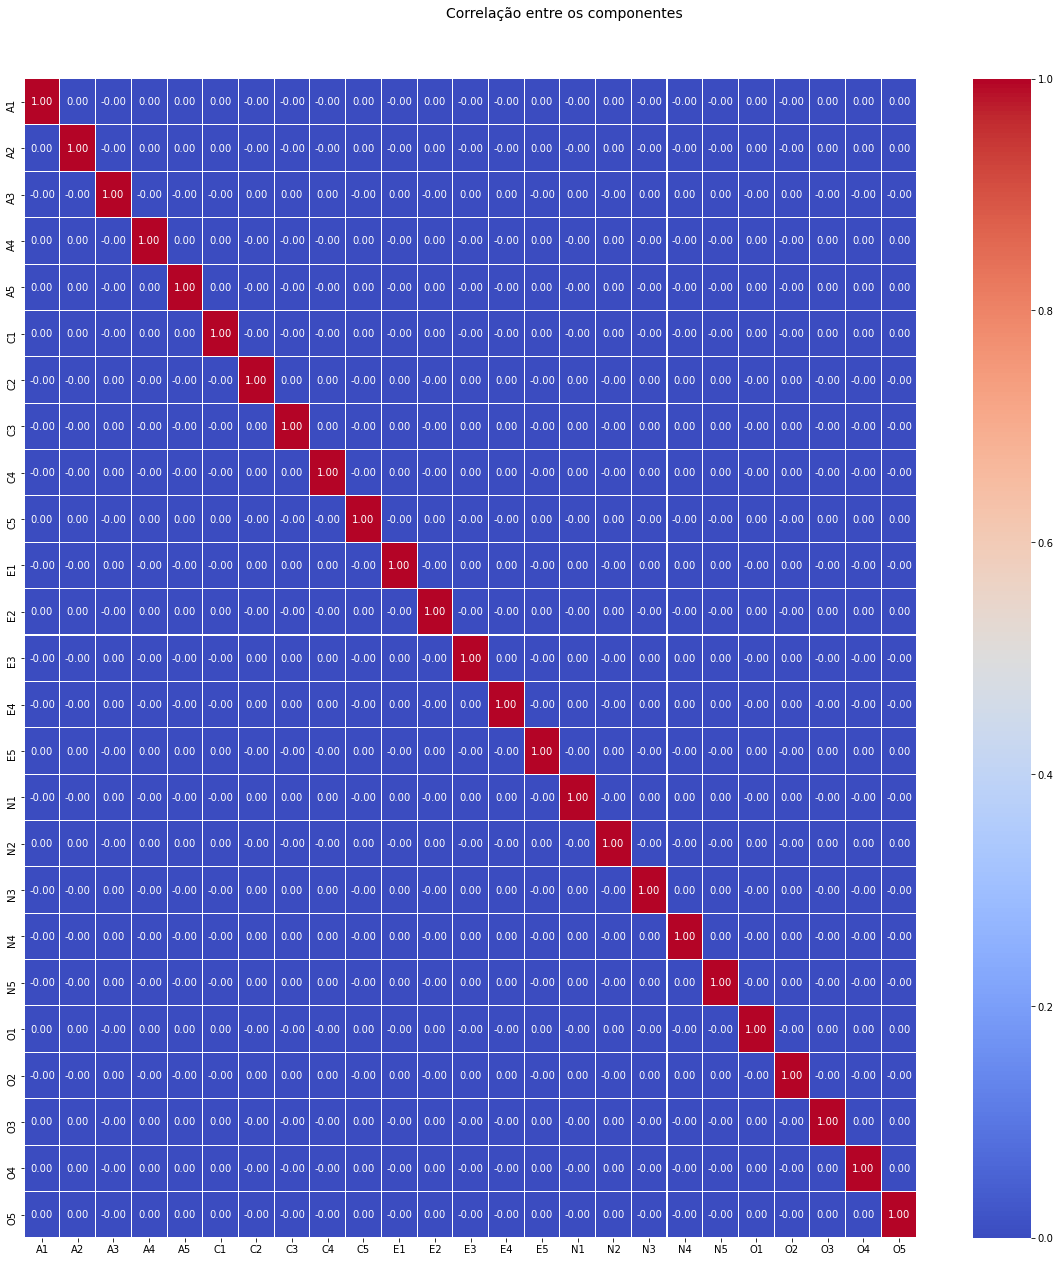

In [82]:
f, ax = plt.subplots(figsize=(20,20))
corr = pd.DataFrame(bfiPC,columns=bfi.columns).corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlação entre os componentes', fontsize=14) 